In [1]:
%matplotlib inline


# Model eigenvalues  

Eigenvalues are a fundamental concept in dynamic models. In simple terms, they summarize the adjustment process within a model. In the context of dynamic models, the sign and magnitude of the eigenvalues determine whether a system of equations will converge to a stable equilibrium, oscillate, or diverge. 

In the case of a macromodel, which is effectively a system of differential equations, the eigenvalues of the coefficient matrix determine whether the system is stable, marginally stable, or unstable. If all the eigenvalues have negative real parts, then the system is stable and will converge to a steady state over time. If at least one eigenvalue has a positive real part, then the system is unstable, and the solutions will diverge over time.


The modelflow library includes a range of methods to calculate the eigenvalues of a model, which can be used to help to assure that a model's dynamics will be stable and to identify sources of instability where they exist.

## Initialization of modelflow environment



In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

%load_ext autoreload
%autoreload 2

In [3]:
from modelclass import model 
from modelnewton import newton_diff
import modelmf
model.widescreen()
model.scroll_off()

## Load a pre-existing model, data and descriptions 

For the purposes of this exposition the climate aware model forPakistan described {cite:author}`burns_climate_2021` is used.



In [4]:
mpak,baseline = model.modelload('../models/pak.pcim',alfa=0.7,run=0,ljit=0)
with mpak.timer('solve') as t: 
    baseline = mpak(baseline,2023,2024,alfa=0.7,ljit=0,solver='sim',silent=1,nonlin=14,forcenum=False,timeit=0)

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim
solve took       :         0.0460965633 Seconds


## the method .newton_diff()

The model flow method `.newtondiff()` calculates the derivatives of the mpak model. The `ljit=True` instructs modelflow to compile the model first. Compiling the model takes time, but subsequent model solutions much more efficient. When a model is going to be solved multiple times, the time taken to compile the model will be compensated for by faster solutions of the model.

The object mpak_newton is an object of typenewton_diff assigned the derivatives from the model.


In [5]:
mpak.PAKBXGSRGNFSCD.eviews

@PC(PAKBXGSRGNFSCD) = @PC(PAKNEEXPGNFSCD) + 0.235962842459732*DUMH


In [6]:
mpak.PAKBXGSRGNFSCD

Endogeneous: PAKBXGSRGNFSCD: Exp., GNFS (BOP), US$ mn
Formular: FRML <DAMP,STOC> PAKBXGSRGNFSCD = (PAKBXGSRGNFSCD_A*PAKBXGSRGNFSCD(-1)/100+ ((100 * ( (PAKNEEXPGNFSCD) / (PAKNEEXPGNFSCD(-1)) -1)) +0.235962842459732*DUMH) *PAKBXGSRGNFSCD(-1)/100+PAKBXGSRGNFSCD(-1)) * (1-PAKBXGSRGNFSCD_D)+ PAKBXGSRGNFSCD_X*PAKBXGSRGNFSCD_D  $

PAKBXGSRGNFSCD  : Exp., GNFS (BOP), US$ mn
DUMH            : 
PAKBXGSRGNFSCD_A: Add factor:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_D: Fix dummy:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_X: Fix value:Exp., GNFS (BOP), US$ mn
PAKNEEXPGNFSCD  : Exp., GNFS (NIA), US$ mn

Values :


Input last run:


In [7]:
mpak.PAKBXGSRGNFSCD.frml

Endogeneous: PAKBXGSRGNFSCD: Exp., GNFS (BOP), US$ mn
Formular: FRML <DAMP,STOC> PAKBXGSRGNFSCD = (PAKBXGSRGNFSCD_A*PAKBXGSRGNFSCD(-1)/100+ ((100 * ( (PAKNEEXPGNFSCD) / (PAKNEEXPGNFSCD(-1)) -1)) +0.235962842459732*DUMH) *PAKBXGSRGNFSCD(-1)/100+PAKBXGSRGNFSCD(-1)) * (1-PAKBXGSRGNFSCD_D)+ PAKBXGSRGNFSCD_X*PAKBXGSRGNFSCD_D  $

PAKBXGSRGNFSCD  : Exp., GNFS (BOP), US$ mn
DUMH            : 
PAKBXGSRGNFSCD_A: Add factor:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_D: Fix dummy:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_X: Fix value:Exp., GNFS (BOP), US$ mn
PAKNEEXPGNFSCD  : Exp., GNFS (NIA), US$ mn




In [8]:
mpak_newton = newton_diff(mpak,forcenum=0,ljit=False)      # create a newton_diff instance which contains derivatives 

In [9]:
#help(mpak_newton)

The get_eigenvectors function calculates the actual eigenvectors of the model.  For a large model this can be a fairly time consuming calcylation taking several minutes  even on relatively powerful multicore i9 computers.

Once the eigenvalues are calculated they can be displayed graphically with the `.eigplot_all()` method.

63.2947725491846


(1512, 1512)

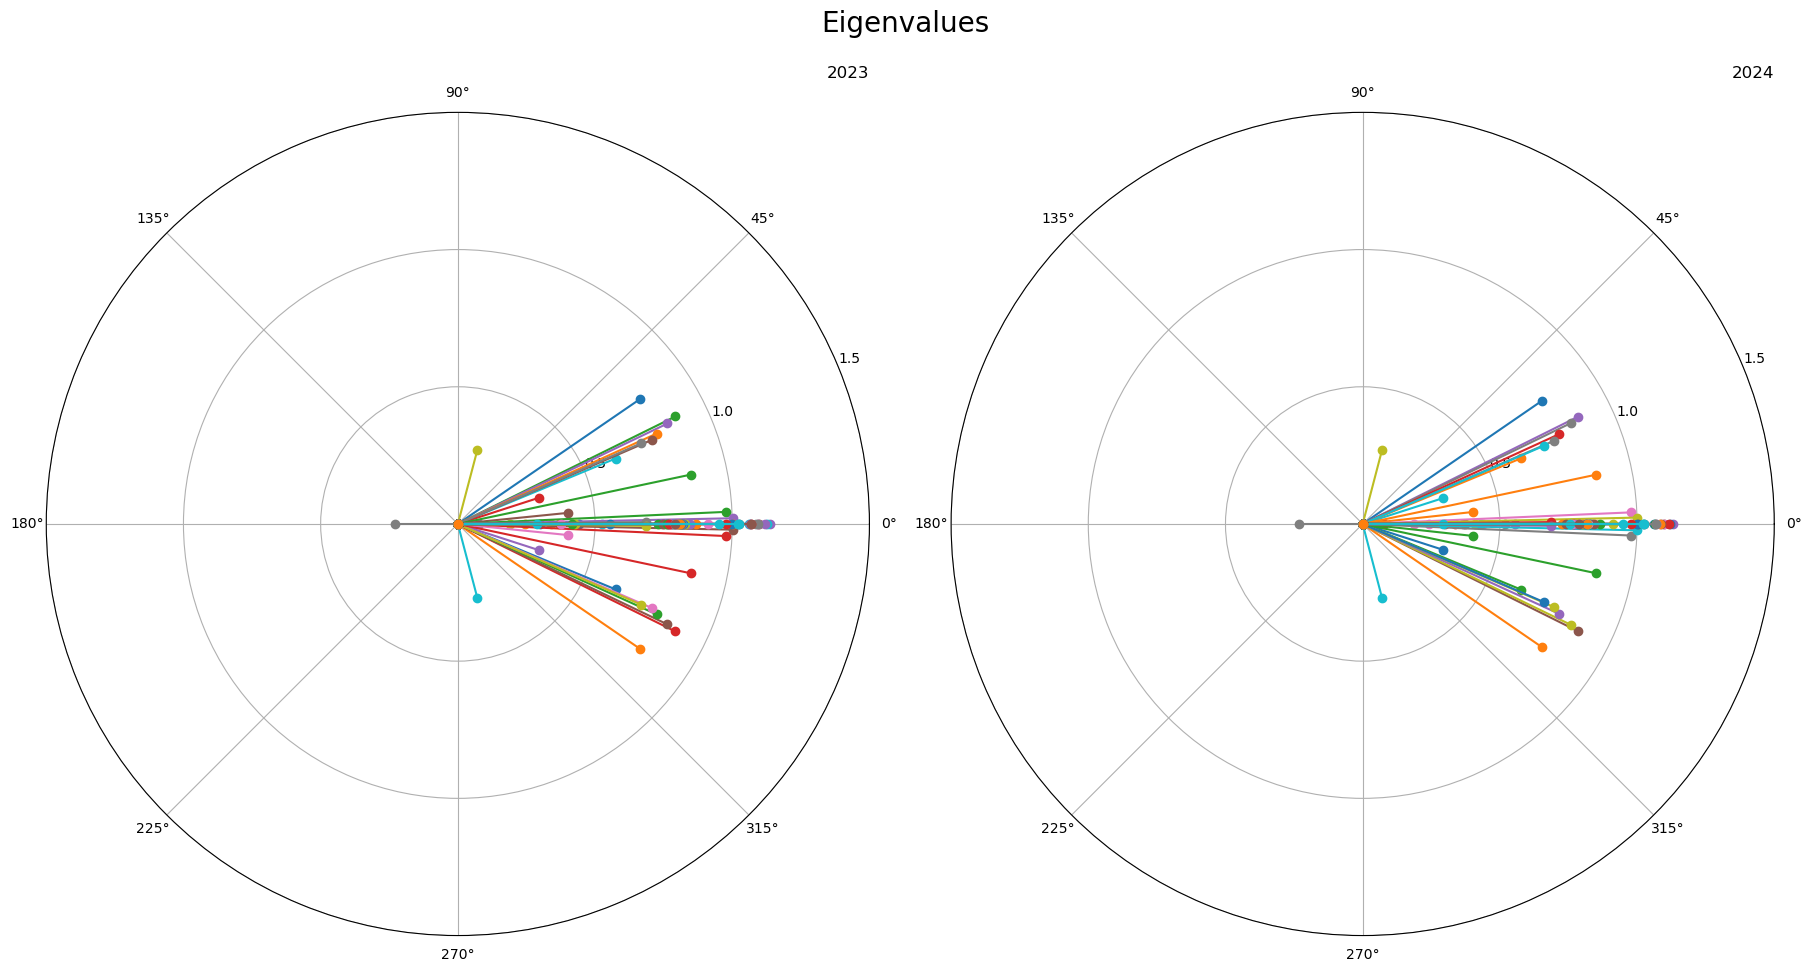

In [10]:
eig_dic = mpak_newton.get_eigenvectors(filnan = True,periode= (2023,2024),silent=False,asdf=1) #  
mpak_newton.eigplot_all(eig_dic,size=(3,3));
mpak_newton.A_dic[2023]['lag=0'].shape
mpak_newton.comp_dic[2023].shape

0 PAKBMFSTINTECD
63.29477255400006


(1508, 1508)

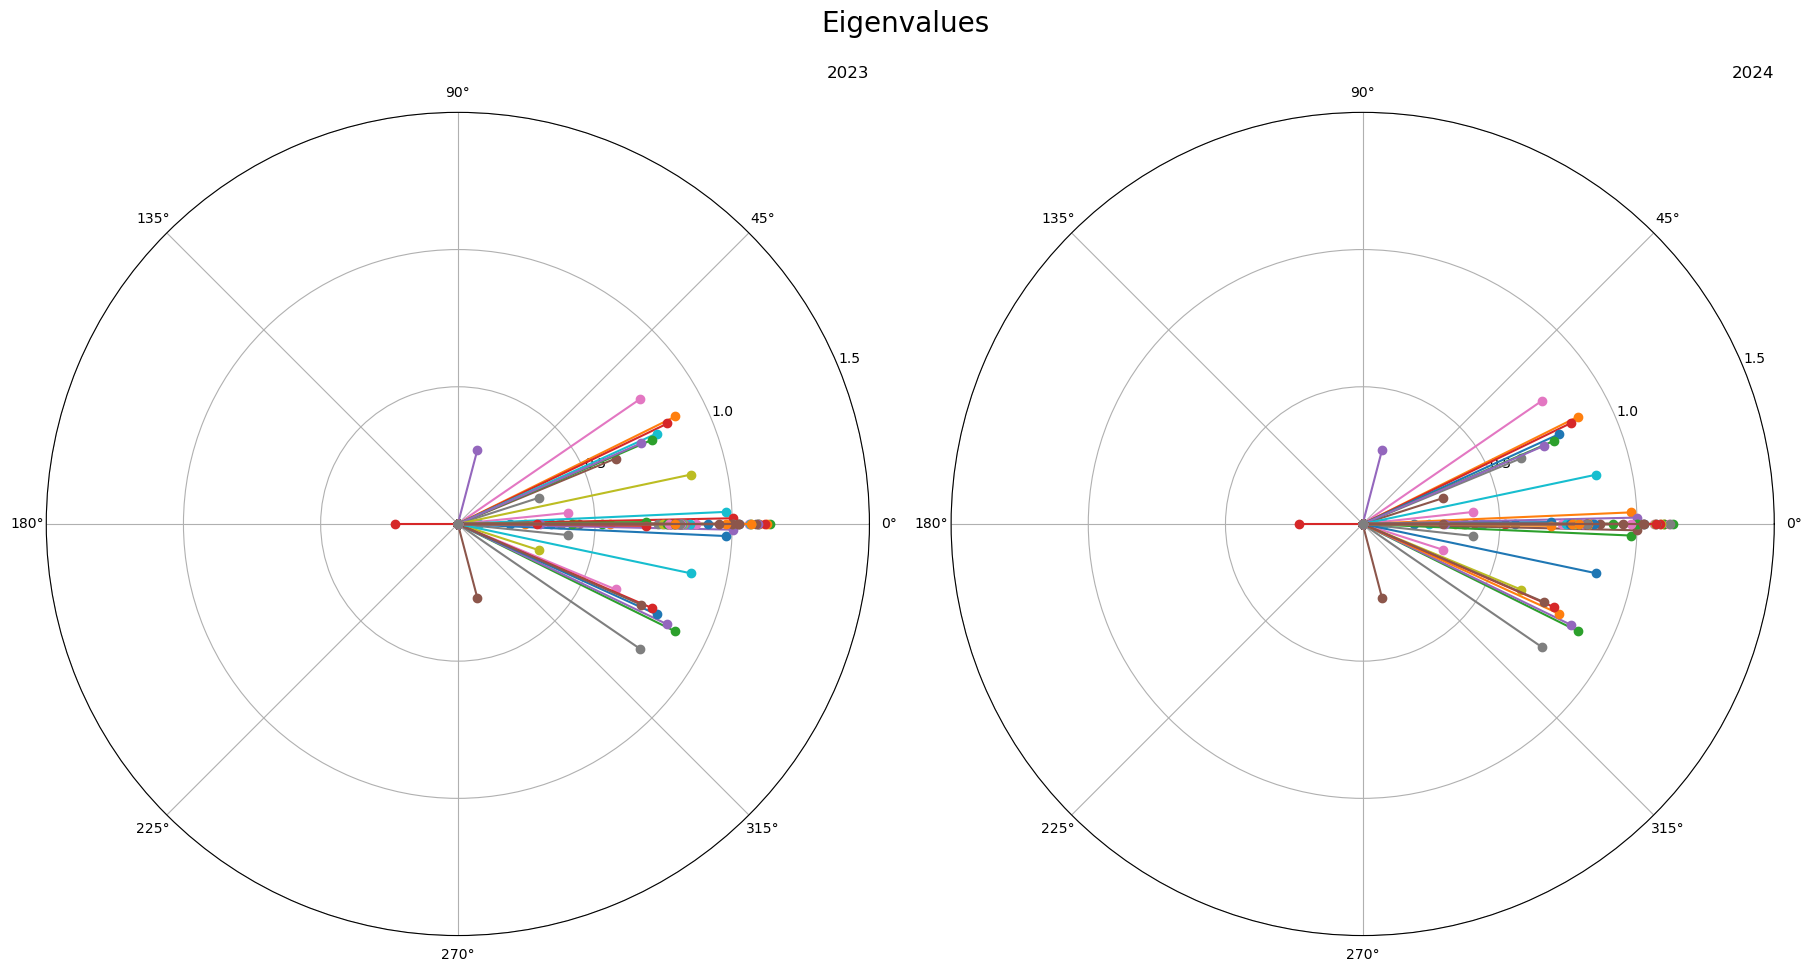

In [11]:
eig_dic = mpak_newton.get_eigenvectors(filnan = True,periode= (2023,2024),silent=False,asdf=1,
                                      dropvar = 'PAKBMFSTINTECD') #  
mpak_newton.eigplot_all(eig_dic,size=(3,3));
mpak_newton.comp_dic[2023].shape

In [12]:
eigen = eig_dic[2023]
gt1_no_imag = [(ii,i)  for ii,i in enumerate(eigen) if abs(i) >= 1 and abs(i.imag) < 0.0000000001]
gt1_imag    = [(ii,i)  for ii,i in enumerate(eigen) if abs(i) >= 1 and abs(i.imag) >  0.00000001]

print(*[f'element {ii} length: {abs(i):.5f} {i.real:.5f} {i.imag:.5f}' for ii,i in gt1_no_imag],sep='\n')
print(*[f'element {ii} length: {abs(i):.5f} {i.real:.5f} {i.imag:.5f}' for ii,i in gt1_imag],sep='\n')

#[f'element {ii} length: {abs(i):.10f} {i.real:.5f} {i.imag:.5f}'  for ii,i in enumerate(eigen) if 0.0000000001 < abs(i) <0.4 ]

element 451 length: 1.09868 1.09868 0.00000
element 452 length: 1.09513 1.09513 0.00000
element 490 length: 1.02299 1.02299 0.00000
element 492 length: 1.13663 1.13663 0.00000
element 531 length: 1.00816 1.00816 0.00000
element 1301 length: 1.12521 1.12521 0.00000
element 1303 length: 1.12010 1.12010 0.00000
element 1304 length: 1.09349 1.09349 0.00000
element 1315 length: 1.08554 1.08554 0.00000
element 1316 length: 1.06036 1.06036 0.00000
element 1317 length: 1.00287 1.00287 0.00000
element 1318 length: 1.06998 1.06998 0.00000
element 1319 length: 1.06368 1.06368 0.00000
element 1321 length: 1.06952 1.06952 0.00000
element 1415 length: 1.02000 1.02000 0.00000
element 1495 length: 1.02441 1.02441 0.00000
element 1313 length: 1.00303 1.00282 0.02084
element 1314 length: 1.00303 1.00282 -0.02084


In [13]:
mpak_newton.A_dic.keys()

dict_keys([2023, 2024])

In [14]:
%%time
count = mpak_newton.get_eigen_jackknife_abs_count()
resabs = mpak_newton.get_eigen_jackknife_abs()

63.2947725491846
0 CHNEXR05
63.294772532757264
1 CHNPCEXN05
63.29477253309756
2 DEUEXR05
63.29477253309756
3 DEUPCEXN05
63.2947725304969
4 FRAEXR05
63.294772560484546
5 FRAPCEXN05
63.294772560484546
6 GBREXR05
63.294772560484546
7 GBRPCEXN05
63.294772560484546
8 ITAEXR05
63.294772560484546
9 ITAPCEXN05
63.294772560484546
10 PAKBMFSTCABTCD
63.29477255400006
11 PAKBMFSTOTHRCD
63.29477255400006
12 PAKBMFSTOTHRCD_FITTED
63.29477255400006
13 PAKBMFSTREMTCD
63.29490465331744
14 PAKBMFSTREMTCD_FITTED
63.294772562946825
15 PAKBMGSRGNFSCD
62.199646249209856
16 PAKBMGSRGNFSCD_FITTED
63.294772553809715
17 PAKBMGSRMRCHCD
62.19608871585252
18 PAKBMGSRMRCHCD_FITTED
63.294772540137416
19 PAKBMGSRNFSVCD
63.29477255898055
20 PAKBNCABFUNDCD
63.294772540137416
21 PAKBNCABFUNDCD_
63.294772540137416
22 PAKBNCABFUNDCN
63.294772540137416
23 PAKBNFSTCABTCD
63.294772540137416
24 PAKBNFSTOTHRCD
63.294772540137416
25 PAKBNFSTREMTCD
63.294772540137416
26 PAKBNGSRGNFSCD
63.294772540137416
27 PAKBNGSRMRCHCD
63.2947

63.29477252404281
218 PAKNVENGNIMPCN
63.30248219575813
219 PAKNVENGNIMPKN
63.30518967962204
220 PAKNVENGNIMPXN
63.29362251686564
221 PAKNVENGOUTPCN
63.2947725678709
222 PAKNVENGOUTPKN
63.294772560439014
223 PAKNVENGTOTLKN
62.4675110197859
224 PAKNVENGTOTLKN_FITTED
63.294772559367765
225 PAKNVENGTOTLXN
63.29536143442319
226 PAKNVGASNIMPCN
63.29647753131234
227 PAKNVGASNIMPKN
63.296514549662916
228 PAKNVGASNIMPQN
63.295844257501706
229 PAKNVGASPRODCN
63.29585778488565
230 PAKNVGASPRODCN2
63.29585779564032
231 PAKNVGASPRODGN
63.29473427284055
232 PAKNVGASPRODKN
63.29592961090295
233 PAKNVGASPRODQN
63.29592958236718
234 PAKNVGASPRODXN
62.2093453765246
235 PAKNVGASPRODXN_FITTED
63.29477261292791
236 PAKNVINDCNSTCN
63.29477253639715
237 PAKNVINDCNSTKN
62.49226088477403
238 PAKNVINDCNSTKN_FITTED
63.294772535716085
239 PAKNVINDCNSTXN
62.14858991021365
240 PAKNVINDCNSTXN_FITTED
63.29477256272474
241 PAKNVINDELECCN
63.29477257775986
242 PAKNVINDELECKN
63.294772581695064
243 PAKNVINDENGYSCN
63.29

In [15]:
import pandas as pd
resdf = pd.DataFrame.from_dict(resabs[2023],orient='index')

KeyError: 2023

In [ ]:
resdf

In [ ]:
resdf.plot(kind='hist',bins=500)

In [ ]:
mpak.PAKBXGSRGNFSCD

In [ ]:
mpak

In [ ]:
mpak.modeldash('PAKBXGSRGNFSCD')

In [ ]:
len(org['ALL'][2023])

In [ ]:
len(org['CHNEXR05_excluded'][2023])

In [ ]:
org.keys()